# Testing Exercises

In this exercise there is no additional coding required. All code has been provided and you are only expected to look and do some small calculations based on the actions of the gates that we have learnt during the class and learning exercises. You can stick to the truth tables of the individual gates like we did it together for the teleportation circuit before.

In [2]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import random_statevector


# Super Dense Coding
The following code block creates a circuit capable of execuitng super dense encoding. Although we have not seen this circuit before, we have all the tools required to fully understand what is going on. Alice and Bob each have their own qubit which have a H and CX gate applied on them, (as seen in the learning exercises). Alice then "encodes her two bits of information in her qubit by either applying an X or a Z gate to her qubit. Then, Alices qubit is sent back to Bob and a CX and H gate are applied on the two qubits. When Bob measures both qubits he will measure Alice's intened message; two bits of information have been sent in one qubit!

While there is still no coding expected, it would be useful to see how this circuit works by changing Alice's message. You can do this in the code block below.

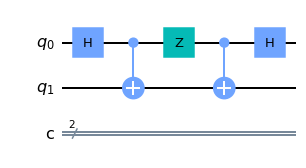

In [38]:
  # Create the "hardware" of our quantum computer
qr_super_dense = QuantumRegister(2, name="q")    # Protocol uses 3 qubits
c = ClassicalRegister(2, name="c")
superdense_circuit = QuantumCircuit(qr_super_dense, c)  # Putting them all together in one "circuit"
  # Apply Hadamard gate to the first qubit (0)
superdense_circuit.h(0)
  # Apply cNOT gate with first as a control
superdense_circuit.cx(0,1)
  # At this point, we have a bell state.
  # Now we want Alice to encode her "message" in her first qubit

### CHANGE ALICE'S MESSAGE
Alice_message = [1,0]  # Other possible messages are 00: [0,0] 01: [0,1] and 10: [1,0]
### CHANGE ALICE'S MESSAGE
if Alice_message[0] == 1:
    superdense_circuit.z(0)
if Alice_message[1] == 1:
    superdense_circuit.x(0)




  # Now we apply the reverse (decoder), but to the second and third qubits
superdense_circuit.cx(0,1)
superdense_circuit.h(0)
superdense_circuit.draw('mpl')

The following code block runs simulations of our super dense coding circuit. The output of this is the state vector of both qubits.
<b> If Alice's message is: 00, 01, 10, 11, what is the state of qubits q0q1 at each stage of this circuit?

<b> If Alice's message is 00:
<b> after the first H the state is (|0> + |1>)|0>
<b> after the first cx: (|00> + |11>)
<b> after the second cx: (|00> + |10>)
<b> after the final H gate: 00

<b> If Alice's message is 01:
<b> after the first H the state is (|0> + |1>)|0>
<b> after the first cx: (|00> + |11>)
<b> after the x gate on q0: (|10> + |01>)
<b> after the second cx: (|11> + |01>) == (|1> + |0>)|1>
<b> after the final H gate: 01

<b> If Alice's message is 10:
<b> after the first H the state is (|0> + |1>)|0>
<b> after the first cx: (|00> + |11>)
<b> after the z gate on q0: (|00> - |11>)
<b> after the second cx: (|00> - |10>) == (|0> - |1>)|0>
<b> after the final H gate: 10
S
<b> If Alice's message is 11:
<b> after the first H the state is (|0> + |1>)|0>
<b> after the first cx: (|00> + |11>)
<b> after the z gate on q0: (|00> - |11>)
<b> after the x gate on q0: (|10> - |01>)
<b> after the second cx: (|11> - |01>) == (|1> - |0>)|1>
<b> after the final H gate: 11

C:\Users\nadee\anaconda3\envs\MyQuisKitEnv\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


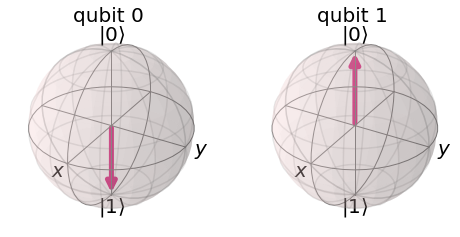

In [39]:
superdense_circuit.save_statevector() # Tell the simulation to save the state vector as we run it
result = sim.run(superdense_circuit, shots = 1000).result()
out_vector = result.get_statevector()
counts = result.get_counts(superdense_circuit)
superdense_circuit.reset(qubit=qr_super_dense)  # Reset the circuit ready for the next run
plot_bloch_multivector(out_vector)
